# This page shows how to use betterplotlib.

In [4]:
%matplotlib inline
import betterplotlib as bpl
import matplotlib.pyplot as plt
import numpy as np

bpl.default_style()

In [11]:
xs = np.random.normal(0, 2, 10000)
ys = np.random.normal(0, 2, 10000)

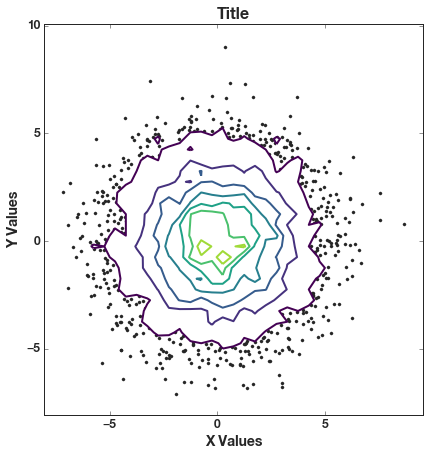

In [18]:
bpl.contour_scatter(xs, ys, bin_size=0.5)
bpl.equal_scale()
bpl.add_labels("X Values", "Y Values", "Title")